In [1]:
import pandas as pd
import numpy as np
import researchpy as rp
from scipy import stats

import matplotlib.pyplot as plt
import pydotplus
from matplotlib import rcParams
import seaborn as sb

from collections import Counter

In [2]:
df1 = pd.read_csv('2_SalesEffect_Cleaned_Encoded.csv')
df1.head()

,c_Product_ID,c_Source,c_Sales_Agent,c_Location,c_Delivery_Mode,y_Status
0,8,16,4,1,0,1
1,18,2,5,10,4,1
2,17,23,1,13,0,1
3,14,23,8,6,0,0
4,17,2,8,1,0,1


In [3]:
# Create All lists
AllColumns = ['c_Product_ID', 'c_Source','c_Sales_Agent', 
              'c_Location', 'c_Delivery_Mode', 'y_Status']

# No Continuous Columns
ConVarList=[]

CatVarList = ['c_Product_ID', 'c_Source','c_Sales_Agent', 
              'c_Location', 'c_Delivery_Mode']

OutcomeVar=['y_Status']

# Feature Engg tests Summary

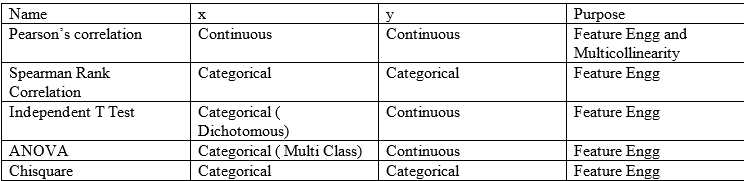

# Delete all ID columns like ID, Name, EmailID, phone no etc if any

In [10]:
# There are no ID or ID like columns
#Delete_Col_List = ['a','b']
#df1.drop(Delete_Col_List, inplace=True,axis=1)

# Check Multi-Collinearity - using Correlation on predictor continuous variables 

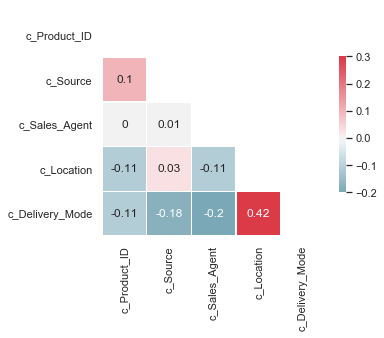

In [12]:
# Run pearson Correlation - There are no Continupus Variables

# How ever We can do Spearman Correlation to test multicolinearlty amoung categorical variables

Corr_CatVarList= df1[CatVarList].corr(method='spearman').round(2)
# Masking of upper traingle
sb.set(style="white")
mask = np.zeros_like(Corr_CatVarList, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True
# Plotting
rcParams['figure.figsize'] = 5,5
sb.heatmap(Corr_CatVarList,annot = True,mask=mask,cmap = sb.diverging_palette(220, 10, as_cmap=True),vmax=.3,center=0,square=True,linewidths=.5,cbar_kws={"shrink": .5})

# where ever the value of r >.75, it means very high correlation. we can look at deleting on eof the intersecting variables.
# In this case no strong correlations so no multicollinearity
# We can conclude that there is no multicollinearity among the categorical varibales


# Checking if each categoriable variable has a statistically signifcant association with categorical outcome variable

## Below sample is for just one, we have to do for every combination of categorical predictor with outcome varibales

In [9]:
#Null Hypothesis: There is no association between the variables

print(pd.crosstab(df1.c_Product_ID, df1.y_Status))
chi2, p, dof, expected = stats.chi2_contingency(pd.crosstab(df1.c_Product_ID, df1.y_Status))

print("Chi     :",chi2)
print("P-value :",p)
print("dof     :",dof)
#print("expected:",expected)

# Repeat the above for every combination and you will get the result:
#p-value:0.0 < 0.05. Therefore c_Product_ID is IMPORTANT for Prediction
#p-value:0.0 < 0.05. Therefore c_Source is IMPORTANT for Prediction
#p-value:0.0 < 0.05. Therefore c_Sales_Agent is IMPORTANT for Prediction
#p-value:0.0 < 0.05. Therefore c_Location is IMPORTANT for Prediction
#p-value:0.0 < 0.05. Therefore c_Delivery_Mode is IMPORTANT for Prediction

y_Status         0    1    2    3
c_Product_ID                     
0                1    0    0    0
1               67   14    5    0
2               21    8    5    1
3                3    2    2    0
4              250   67   35   52
5                4    2    1    0
6                1    0    0    0
7                3    0    1    0
8              411  207   99  186
9               55   44   15   37
10               8    3    0    1
11              17    6    2    4
12               3    0    0    0
13              26    0    0    0
14            1268   60   18    2
15               3    0    0    0
16               5    1    0    0
17             677  427  240  167
18             446  286  111  262
19              35   19    8   33
20              29    8    8   15
21               4    0    1    0
22               2    0    0    0
23               1    0    0    0
24              45   23    8    6
25              11   11    2    2
26             330  162   84   84
27            

# Check Correlation of Categorical Predictors with the Categorical Outcome - using Sphearman.

### Please note that we have alre done CHISquare test, this test is not required but put in only for academic purposes

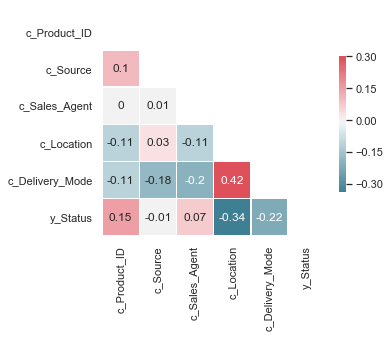

In [13]:
Corr_AllColumns= df1[AllColumns].corr(method='spearman').round(2)
# Masking of upper traingle
sb.set(style="white")
mask = np.zeros_like(Corr_AllColumns, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True
# Plotting
rcParams['figure.figsize'] = 5,5
sb.heatmap(Corr_AllColumns,annot = True,mask=mask,cmap = sb.diverging_palette(220, 10, as_cmap=True),vmax=.3,center=0,square=True,linewidths=.5,cbar_kws={"shrink": .5})

#The Resuslt show the correalations with y_status are having low values, but chi square has already proved its signifcance

# Check if Categorcal predictor impacts continuous Outcome variables
## If the class of predictor is dicotomous use t-test else use Anova
### Use ful only in case of regression
#### Should be done for every combination of Predicor and outcome. An all the tests which have p-value < 0.05, those predicors should be retained and others deleted

In [17]:
## 
#Make groups based on categorical varibale c_sex
#Females = df1[df1.c_sex==0]
#Males = df1[df1.c_sex==1]

# the the t test on Salary bands of the two groups
#stats.ttest_ind(Males.y_salary_band,Females.y_salary_band)

# Since being male or female has impact on the salary, this variable cannot be deleted
# p<0.05 so null hypothesis that "there is no difference in performance between the males-females" is rejected.
#i.e there is indeed defference in the salary of the males and females. this is being suggesed by barcharts in EDA also.


# PCA could be done for dimensionality reduction only if it improves the accuracy.

## PCA is not required as all the varibales are catrgorical in nature.

In [ ]:
# This Data set doent need PCA

# Feature Creation - Primarily done based on conclusions from domain knowledge analysis.
## look at below criteria
###               1) Appropriate bin sizes for converting continuous variable into categorical variable
###               2) Combining categories, 
###               3) Creating new features based on linear transformations of other variables.
####                      e.g duration can be created by taking difference of two dates
###               4) Usefulness of variables and metrics

In [ ]:
# This dataset doent need any of it

# Attribute Transformation : 
###  A function that maps the entire set of values of a given attribute to a new  set of replacement values such that        each old value can be identified with one of the new values
###              1) Simple functions: x^k, log(x), e^x, |x|
###              2) Standardization ( Sales are different): Z score & 
###              3) Normalization: Min-Max normalization

In [ ]:
# This dataset doent need any of it

# Dimesionality Reduction in text analysis
## For text analysis, various methods like stemming, lemmetization, rmeoval of stopping words, removal of repeated letters etc can be used to reduce the dimensions.

In [ ]:
# This dataset doent need any of it